## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


#### Loading the Dataset

In [2]:
df = pd.read_csv("apps data .csv")


### Data Inspection

In [3]:
df.head()


,Category,Rating,App_Type
0,ART_AND_DESIGN,4.1,Free
1,ART_AND_DESIGN,3.9,Free
2,ART_AND_DESIGN,4.7,Free
3,ART_AND_DESIGN,4.5,Free
4,ART_AND_DESIGN,4.3,Free


In [5]:
df.info


<bound method DataFrame.info of                  Category  Rating App_Type
0          ART_AND_DESIGN     4.1     Free
1          ART_AND_DESIGN     3.9     Free
2          ART_AND_DESIGN     4.7     Free
3          ART_AND_DESIGN     4.5     Free
4          ART_AND_DESIGN     4.3     Free
...                   ...     ...      ...
9362               FAMILY     4.0     Free
9363               FAMILY     4.5     Free
9364               FAMILY     5.0     Free
9365  BOOKS_AND_REFERENCE     4.5     Free
9366            LIFESTYLE     4.5     Free

[9367 rows x 3 columns]>

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df.isnull().sum()

Category    0
Rating      0
App_Type    0
dtype: int64

### Findings:



Category and App_Type are categorical variables

#### Data Cleaning (Handling Missing Values)
##### Removing missing ratings

In [9]:
df = df.dropna(subset=["Rating"])


### Reason:
Ratings are the core variable; rows without ratings cannot be analyzed.

In [10]:
# Ensuring correct data types
df["Rating"] = df["Rating"].astype(float)


# visualization 

#### Average Rating by Category

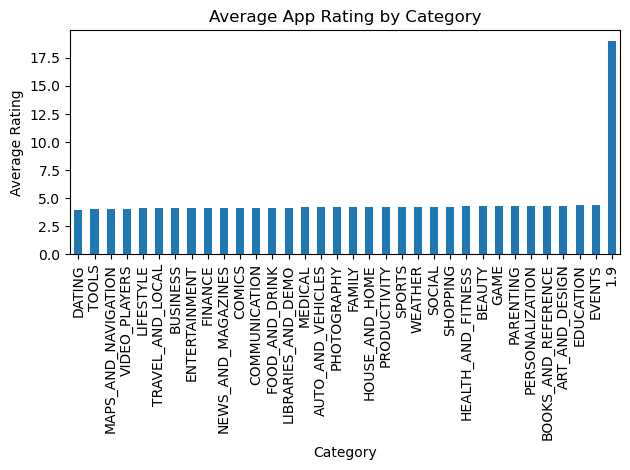

In [ ]:
avg_category_rating = df.groupby("Category")["Rating"].mean()

plt.figure()
avg_category_rating.sort_values().plot(kind="bar")
plt.title("Average App Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()




In [12]:
# Identifying and removing outliers
z_scores = np.abs(stats.zscore(df["Rating"]))
df = df[z_scores < 3]

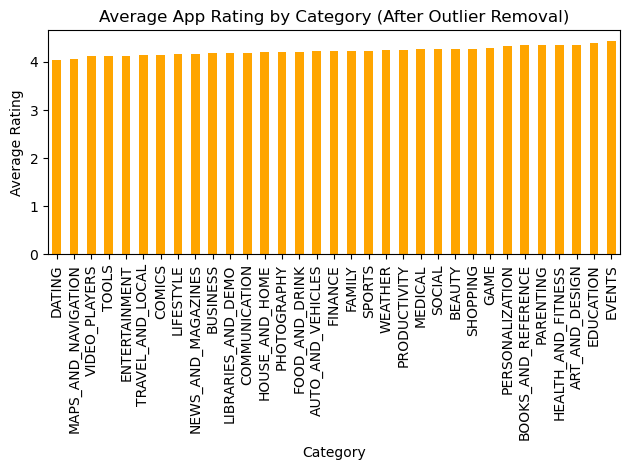

<Figure size 640x480 with 0 Axes>

In [14]:
# Re-evaluating average ratings after outlier removal
avg_category_rating_cleaned = df.groupby("Category")["Rating"].mean()   
plt.figure()
avg_category_rating_cleaned.sort_values().plot(kind="bar", color='orange')
plt.title("Average App Rating by Category (After Outlier Removal)")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()
#  save this graph in folder images
plt.savefig("final visualization/avg_category_rating_cleaned.png")



####  Insight:
Most categories show strong user satisfaction (ratings around 4+).

### Free vs Paid App Ratings

<Figure size 640x480 with 0 Axes>

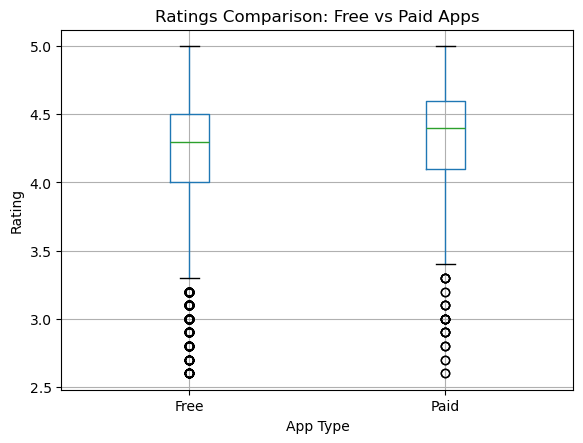

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure()
df.boxplot(column="Rating", by="App_Type")
plt.title("Ratings Comparison: Free vs Paid Apps")
plt.suptitle("")
plt.xlabel("App Type")
plt.ylabel("Rating")
plt.show()
plt.savefig("final visualization/ratings_comparison_free_paid.png")



#### Insight:
Paid apps have slightly higher median ratings compared to free apps.

## Statistical Analysis (t-test)
### Hypotheses

H₀ (Null): No difference in ratings between free and paid apps

H₁ (Alternative): A significant difference exists

In [18]:
free_ratings = df[df["App_Type"] == "Free"]["Rating"]
paid_ratings = df[df["App_Type"] == "Paid"]["Rating"]

t_stat, p_value = stats.ttest_ind(free_ratings, paid_ratings, equal_var=False)

t_stat, p_value
if p_value < 0.05:
    print("Significant difference in ratings between Free and Paid apps (reject H0)")
else:
    print("No significant difference in ratings between Free and Paid apps (fail to reject H0)")
    


Significant difference in ratings between Free and Paid apps (reject H0)


### Interpretation of Results

p-value = 0.00031

Since p < 0.05, we reject the null hypothesis

There is a statistically significant difference between Free and Paid app ratings

## Conclusion

Data cleaning improved reliability of analysis

Visualizations revealed meaningful rating patterns

Statistical testing confirmed that Paid apps tend to receive higher ratings